# SwiftEdit Image Editing Demo

This notebook demonstrates how to use SwiftEdit for fast one-step image editing.



## Setup and Imports

In [1]:
from inference.edit_image import SwiftEditPipeline
import os
from pathlib import Path

from IPython.display import display, Image as IPImage
from PIL import Image


/home/mkuo/.conda/envs/laser3_10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Configure Paths

Set up paths to the model weights. Make sure you've downloaded the weights using the setup script or following the README instructions.


In [ ]:
# Get the root directory
notebook_dir = Path().absolute()
weights_root = notebook_dir / "swiftedit_weights"

inversion_path = weights_root / "inverse_ckpt-120k"
sbv2_path = weights_root / "sbv2_0.5"
ip_adapter_path = weights_root / "ip_adapter_ckpt-90k" / "ip_adapter.bin"

print(f"Weights directory: {weights_root}")
print(f"Inversion model: {inversion_path}")
print(f"SBv2 model: {sbv2_path}")
print(f"IP-Adapter: {ip_adapter_path}")

# Check if weights exist
if not weights_root.exists():
    print(f"\nWarning: {weights_root} does not exist!")
    print("Please download the weights first using the setup script or README instructions.")
else:
    print("\nWeights directory found")


Weights directory: /home/mkuo/swift-edit/swiftedit_weights
Inversion model: /home/mkuo/swift-edit/swiftedit_weights/inverse_ckpt-120k
SBv2 model: /home/mkuo/swift-edit/swiftedit_weights/sbv2_0.5
IP-Adapter: /home/mkuo/swift-edit/swiftedit_weights/ip_adapter_ckpt-90k/ip_adapter.bin

✓ Weights directory found


## Image Editing Pipeline

In [7]:
print("Loading SwiftEdit pipeline...")

device = "cpu"
dtype = "fp32"

pipeline = SwiftEditPipeline(
    inversion_model_path=str(inversion_path),
    sbv2_model_path=str(sbv2_path),
    ip_adapter_path=str(ip_adapter_path),
    device=device,
    dtype=dtype,
)

Loading SwiftEdit pipeline...
Initializing SwiftEdit pipeline...
Loading auxiliary model...
Loading inversion model...


The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 110000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Loading IP-SBv2 model...
SwiftEdit ready


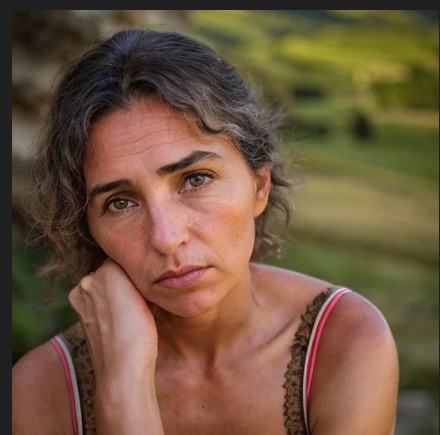

In [8]:
source_image_path = "test_images/woman_face.jpg"
source_image = Image.open(source_image_path).convert("RGB")
display(source_image)

In [9]:
source_prompt = "woman"
edit_prompt = "taylor swift"

print(f"Source prompt: '{source_prompt}'")
print(f"Edit prompt: '{edit_prompt}'")

Source prompt: 'woman'
Edit prompt: 'taylor swift'


In [10]:
print("Editing image...")
result = pipeline.edit(
    source_image=source_image_path,
    source_prompt=source_prompt,
    edit_prompt=edit_prompt,
    use_self_guided_mask=True,
    return_intermediate=True,
)


Editing image...
Editing image...
  Source prompt: woman
  Edit prompt: taylor swift
Step 1/5: Encoding source image...
Step 2/5: Inverting to noise (one-step)...
Step 3/5: Extracting editing mask...
  Mask extracted (coverage: 16.28%)
Step 4/5: Constructing noisy latent...
Step 5/5: Setting up ARaM and generating...
Editing complete


Edited image saved to test_images/taylor_swift.png


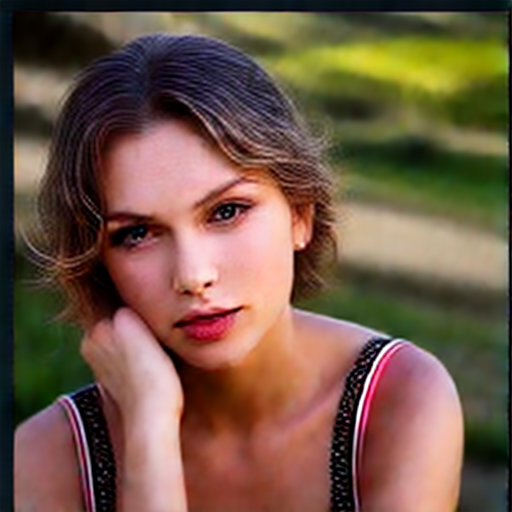

In [ ]:
edited_image = result["edited_image"]
output_path = "test_images/taylor_swift.png"

output_image = Image.open(output_path).convert("RGB")
display(output_image)

edited_image.save(output_path)